#   `lab05`—Modeling Radioactive Decay

**Objectives**

-   Solve a system involving multiple simultaneous equations.
-   Utilize NumPy's random number generation to simulate a random system.

In [5]:
#grade
# Import basic libraries.
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython import get_ipython
mpl.rcParams[ 'figure.figsize' ] = (15,3)


In [6]:
#Run this cell for correct settings
%matplotlib inline

In today's lab, we will examine how populations of radioactive materials can be modeled and represented mathematically.  We begin with a two-element system and evolve to a more sophisticated way of handling many elements in a decay chain.

##  Radioactive Decay of a Single Element

Famously, radioactive materials decaying with a characteristic time, called the _half-life_.  At time $t=t_{1/2}$, one-half of the original material remains; at time $t=2t_{1/2}$, one-quarter remains, and so forth.

The half-life has units of time (typically seconds) and is easy to tabulate.  However, many engineers prefer to work with the _decay constant_ instead, as it has a straightforward application in the governing equations of nuclear decay.  The decay constant is related to the half-life by the formula
$$
\lambda = \frac{\log(2)}{t_{1/2}}
$$
where $\log$ is the natural logarithm.

### <span style="color:#345995">Exercise 1: Calculating a Half-Life</span>

-   Compose a function `L_decay` which returns the value of the decay constant $\lambda$ given as parameter the half-life $t_{1/2}$.

In [10]:
#grade
# Compose your function `L_decay` here.
def L_decay( t_12 ):
    '''
        Calculate the value of the decay constant L given the half-life.

        Args:
            t_12: the half-life of one element. expects this in seconds.
        Returns:
            L: decay constant
    '''
    L = np.log(2) / t_12
    return L
    pass

In [11]:
# You may test your function here if desired.

In [12]:
# your code should pass these tests---do NOT edit this cell
from numpy import isclose
assert isclose( L_decay( 1.5 ),np.log( 2 )/1.5 )
print( 'Success!' )

Success!


### <span style="color:#345995">Exercise 2: Modeling a Two-Element Decay Chain</span>

L_decay( t_12 )Next we consider a particular decay chain containing only two elements, a _parent_ and a _daughter_.  Polonium-210 decays to lead-206 by emitting an alpha particle with a **half-life of 138.376 days.**

In order to model the population of $^{210}$Po at any given time, we can use a simple exponential decay function:

$$
N_{\text{Po}}(t) = {N_{\text{Po}}}_{0} \exp\left( -\lambda t \right) \text{,}
$$

where $N_{\text{Po}}(t)$ denotes the amount of $^{210}$Po remaining at time $t$ from an initial stock ${N_{\text{Po}}}_{0} = 1$ (assume that we begin our simulation with 1 kilogram of $^{210}$Po and no $^{206}$Pb present).

Compose a function `N_Po( t )`, for $N_{\text{Po}}(t)$, which accepts an argument `t` denoting time elapsed in seconds, and returns `N`, the amount of $^{210}$Po remaining.

In [25]:
#grade
# Compose your function `N_Po` here.
def N_Po( t ):
    '''
        Calculate the remaining portion of Po-210 at a given time.

        Args:
            t: time elapsed, s
        Returns:
            N: population of remaining Po-210
    '''
    N = np.exp( (-t) * L_decay( 138.376*24*60*60 ) )
    return N
    # Hint: use L_decay! 
    pass 

In [26]:
# You may test your function here if desired.

In [27]:
# your code should pass these tests---do NOT edit this cell
from numpy import isclose
assert isclose( N_Po( 0 ),1.0 )
if isclose( N_Po( 138.376 ),0.5 ):
    print( 'Make sure to use seconds, not days.' )
    raise AssertionError
assert isclose( N_Po( 11955686.4 ),0.5 )
print('Success!')

Success!


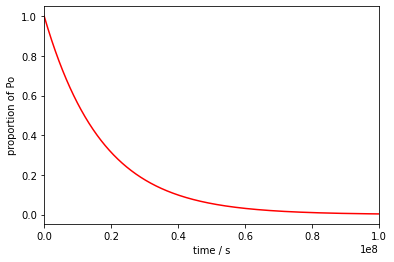

(1001,)

In [28]:
# Visualize the resulting change in population.
times = np.linspace( 0,1e8,1001 )
atoms = N_Po( times )
plt.plot( times,atoms,'r-' )
plt.xlim( ( min( times ),max( times ) ) )
plt.ylabel( 'proportion of Po' )
plt.xlabel( 'time / s' )
plt.show()
np.sum( atoms )
atoms.shape

##  Radioactive Decay of Two Elements

What happens if we simulate a three-element system:  that is, one in which the daughter of the first element also decays?

Consider the system of thorium-232.  $^{232}$Th is stable but can be used as nuclear fuel when it is _activated_ by a neutron to become $^{233}$Th.  $^{233}$Th then beta decays via $^{233}$Pa to yield $^{233}$U, an excellent nuclear fuel, but with a sufficiently long half-life that we will treat it as the stable decay product.  Assuming only $^{233}$Th to be present at first, we model the two-step reaction:

$$
\begin{align}
N_{\text{Th}}(t) & = {N_{\text{Th}}}_{,0} \exp\left( -\lambda_{\text{Th}} t \right) \\
N_{\text{Pa}}(t) & = \frac{\lambda_{\text{Th}}}{\lambda_{\text{Pa}} - \lambda_{\text{Th}}} {N_{\text{Th}}}_{,0} \left( \exp\left( -\lambda_{\text{Th}} t \right) - \exp\left( -\lambda_{\text{Pa}} t \right) \right) \\
N_{\text{U}}(t)  & = 1 - {N_{\text{Th}}}( t ) - {N_{\text{Pa}}}( t )
\end{align}
$$

where $N_{\text{X}}(t)$ denotes the amount of species X remaining at time $t$ from an initial stock ${N_{\text{Th}}}_{,0} = 1$.

| Species | Half-Life |
| ------- | --------- |
| $^{233}$Th | 21.83 minutes |
| $^{233}$Pa | 26.975 days |
| $^{233}$U  | "stable" (stable for our purposes) |

Assume that we begin our simulation with 1 kilogram of $^{210}$Po and no $^{206}$Pb present.

### <span style="color:#345995">Exercise 3: Modeling a Three-Element Decay Chain</span>

Compose the following functions:

- `N_Th( t )`, for $N_{\text{Th}}(t)$, which accepts an argument `t` denoting time elapsed in seconds, and returns `N`, the amount of $^{233}$Th remaining.
- `N_Pa( t )`, for $N_{\text{Pa}}(t)$, which accepts an argument `t` denoting time elapsed in seconds, and returns `N`, the amount of $^{233}$Pa remaining.
- `N_U( t )`, for $N_{\text{U}}(t)$, which accepts an argument `t` denoting time elapsed in seconds, and returns `N`, the amount of $^{233}$U remaining.

In [84]:
#grade
# Compose your functions here.
Pa = L_decay(26.975 * 24 * 60 * 60)
Th = L_decay(21.83 * 60)
    
def N_Th(t):
    return 1*np.exp(-Th * t)

def N_Pa(t):
    return (Th/(Pa-Th))*1*(np.exp(-Th*t)-np.exp(-Pa*t))

def N_U(t):
    return 1 - (N_Th(t)) - (N_Pa(t))

In [85]:
# You may test your function here if desired.

In [86]:
# your code should pass these tests---do NOT edit this cell
from numpy import isclose
assert isclose( N_Th( 0 ),1.0 )
assert isclose( N_Th( 21.83*60 ),0.5 )
print('Success!')

Success!


In [87]:
# your code should pass these tests---do NOT edit this cell
from numpy import isclose
assert isclose( N_Pa( 0 ),0.0 )
assert isclose( N_Pa( 26.975*24*60*60 ),0.5,rtol=1e-3 )
print('Success!')

Success!


In [88]:
# your code should pass these tests---do NOT edit this cell
from numpy import isclose
assert isclose( N_U( 0 ),0.0 )
assert isclose( N_U( 21.83*60 ),1-N_Th( 21.83*60 )-N_Pa( 21.83*60 ),rtol=1e-3 )
print('Success!')

Success!


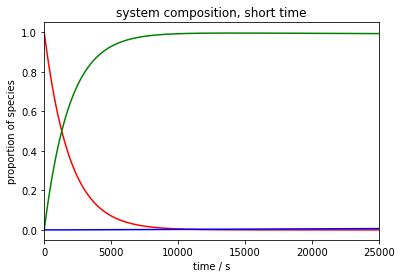

In [89]:
# Visualize the resulting change in population.
times = np.linspace( 0,25000,1001 )
atoms_Th = N_Th( times )
atoms_Pa = N_Pa( times )
atoms_U  = N_U( times )
plt.plot( times,atoms_Th,'r-' )
plt.plot( times,atoms_Pa,'g-' )
plt.plot( times,atoms_U, 'b-' )
plt.xlim( ( min( times ),max( times ) ) )
plt.ylabel( 'proportion of species' )
plt.xlabel( 'time / s' )
plt.title( 'system composition, short time' )
plt.show()

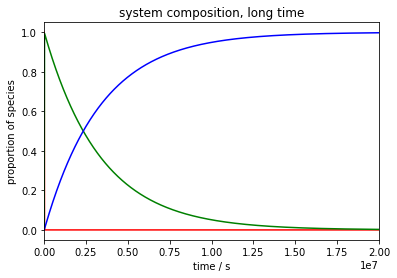

In [90]:
# Visualize the resulting change in population.
times = np.linspace( 0,2e7,1001 )
atoms_Th = N_Th( times )
atoms_Pa = N_Pa( times )
atoms_U  = N_U( times )
plt.plot( times,atoms_Th,'r-' )
plt.plot( times,atoms_Pa,'g-' )
plt.plot( times,atoms_U, 'b-' )
plt.xlim( ( min( times ),max( times ) ) )
plt.ylabel( 'proportion of species' )
plt.xlabel( 'time / s' )
plt.title( 'system composition, long time' )
plt.show()

In the above case, you can see that the $^{233}$Th rather quickly converts to $^{233}$Pa, which then takes much longer to convert to $^{233}$U.  (`1e7` s is about three months.)

##  Radioactive Decay of a System

The next system we will examine will involve a longer decay chain:  the actinide series.

Consider the following four-element chain:

$^{222}$Rn $\xrightarrow{\alpha}$ $^{218}$Po $\xrightarrow{\alpha}$ $^{214}$Pb $\xrightarrow{\beta^{-}}$ $^{214}$Bi

For more elements than three, it rapidly becomes cumbersome to derive and express the relations in terms of analytical equations, and we switch to a numerical representation—our old friend, the finite difference equation.

We need to model a balance equation for each species:

$$
\begin{align}
\frac{d N_{\text{X}}}{dt} & = \text{gain} - \text{loss} \\
\frac{d N_{\text{X}}}{dt} & = \left[ \sum_\text{sources} \right] - \left[ \sum_\text{decays} \right] \\
\frac{\Delta N_{\text{X}}}{\Delta t} & = \left[ \lambda_{\text{W}} N_{\text{W}} \right] - \left[ \lambda_{\text{X}} N_{\text{X}} \right]
\end{align}
$$

assuming the decay chain W→X→Y.

>The trickiest part here is that for numerical stability, the $\Delta t$ should be small with respect to the _smallest_ half-life $t_{1/2}$.  This means that finite-difference equations are not appropriate for modeling systems with half-lives spanning several orders of magnitude, and other methods must be used.  We will stick to a "safe" system which has been hand-picked to be stable for our chosen $\Delta t$.

Our finite-difference equations become, after some algebra:

$$
\begin{align}
\Delta N_{\text{Rn}} & =                                                    -\Delta t \lambda_{\text{Rn}} \Delta N_{\text{Rn}} & \\
\Delta N_{\text{Po}} & = \Delta t \lambda_{\text{Rn}} \Delta N_{\text{Rn}} & - \Delta t \lambda_{\text{Po}} \Delta N_{\text{Po}} \\
\Delta N_{\text{Pb}} & = & \Delta t \lambda_{\text{Po}} \Delta N_{\text{Po}} & - \Delta t \lambda_{\text{Pb}} \Delta N_{\text{Pb}} \\
\Delta N_{\text{Bi}} & = & & \Delta t \lambda_{\text{Pb}} \Delta N_{\text{Pb}} &  
\end{align}
$$

(Bismuth isn't really a true termination point for this chain, but this is enough for us to implement right now.)

### <span style="color:#345995">Exercise 4: Modeling a System Decay Chain</span>


Compose a function `delta_N` which accepts an argument `dt` and a vector of species populations `N` and returns the expected differential change in the respective species in `N`.

| Species | Half-Life  |
| ------- | ---------- |
| Rn      | 3.82 day   |
| Po      | 3.1 min    |
| Pb      | 26.8 min   |
| Bi      | irrelevant |

$$
\underline{\underline{A}}
=
\left(
\begin{matrix}
-\lambda_{\text{Rn}} dt & 0 & 0 & 0 \\
\hphantom{+}\lambda_{\text{Rn}} dt & -\lambda_{\text{Po}} dt & 0 & 0 \\
 0 & \hphantom{+}\lambda_{\text{Po}} dt & -\lambda_{\text{Pb}} dt & 0 \\
 0 & 0 & \hphantom{+}\lambda_{\text{Pb}} dt & 0\\
\end{matrix}
\right)
$$

In [95]:
#grade
def delta_N( dt,N ):
    Rn = L_decay(3.82*24*60*60) # use L_decay to fill these in.  Make sure to convert units.
    Po = L_decay(3.1*60)
    Pb = L_decay(26.8*60)
    
    # Construct a matrix to carry out the equations, following A above.
    A = np.zeros( ( 4,4 ) )
    A[ 0,0 ] = -Rn * dt
    A[ 1,0 ] = Rn *dt
    A[ 1,1 ] = -Po *dt
    A[ 2,1 ] = Po *dt
    A[ 2,2 ] = -Pb *dt
    A[ 3,2 ] = Pb *dt
    
    
    return A @ N   # matrix multiplication of A times N

The way this matrix works is that given a time step size `dt` ($\Delta t$) and a vector of species populations `N`, it returns the expected change in the population.

$$
\Delta \vec{N}
=
\underline{\underline{A}} \left(
\begin{matrix}
N_{\text{Rn}} \\
N_{\text{Po}} \\
N_{\text{Pb}} \\
N_{\text{Bi}}
\end{matrix}
\right)
$$

Thus, we have to iterate through a loop in time to solve the rest of the system:

$$
\left(
\begin{matrix}
N_{\text{Rn}} \\
N_{\text{Po}} \\
N_{\text{Pb}} \\
N_{\text{Bi}}
\end{matrix}
\right)^{t}
=
\left(
\begin{matrix}
N_{\text{Rn}} \\
N_{\text{Po}} \\
N_{\text{Pb}} \\
N_{\text{Bi}}
\end{matrix}
\right)^{t-1}
+
\underline{\underline{A}} \left(
\begin{matrix}
N_{\text{Rn}} \\
N_{\text{Po}} \\
N_{\text{Pb}} \\
N_{\text{Bi}}
\end{matrix}
\right)^{t-1}
$$

where the superscript indicates the time step, not exponentiation.

<div class="alert alert-info">
You don't need to change much in the following cells.  They're largely for concept demonstration.  Read them, though, as they may prove useful in future modeling in this and other classes.
</div>

In [96]:
#grade
# Number of time steps to simulate.
nt = int( 1e5 )   # try 1e5 for testing purposes---then switch to 5e6 which will take longer
dt = 1e-1

# Set up initial composition of system, 1 kg radon. 
N = np.zeros( ( 4,nt ),dtype=np.float64 )
N[ 0,0 ] = 1.0  # kg Rn

for t in range( 1,nt ):
    N[ :,t ] = N[ :,t-1 ] + delta_N( dt,N[ :,t-1 ] )

In [97]:
# your code should pass these tests---do NOT edit this cell
from numpy import allclose
assert allclose( N[ :,-1 ],np.array( [ 9.79217792e-01,5.52153656e-04,4.72250559e-03,1.55075488e-02] ) )
print('Success!')

Success!


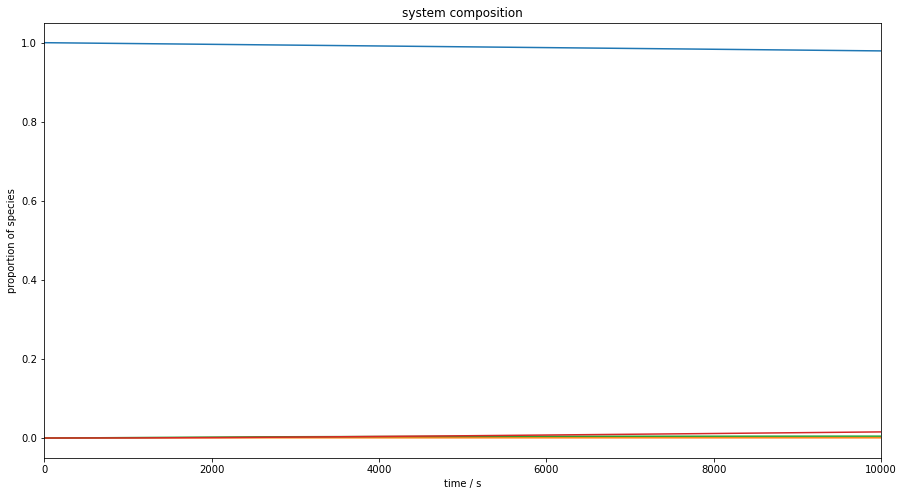

In [98]:
# Visualize the resulting change in population.
times = np.linspace( 0,nt*dt,nt )

mpl.rcParams[ 'figure.figsize' ] = (15,8)  # resize the figure for viewing convenience

plt.plot( times,N.T )
plt.xlim( ( min( times ),max( times ) ) )
plt.ylabel( 'proportion of species' )
plt.xlabel( 'time / s' )
plt.title( 'system composition' )

plt.show()
mpl.rcParams[ 'figure.figsize' ] = (15,3)  # reset the figure size to what it was before

##  References

-   ["General solution of Bateman equations for nuclear transmutations"](http://www.sciencedirect.com/science/article/pii/S0306454906000284)
-   ["Simulating radioactive decay chains with spreadsheets"](http://wordpress.mrreid.org/wp-content/uploads/2011/07/simulating-radioactive-decay-chains-with-spreadsheets.pdf)